## Data cleaning and Exploratory Data Analysis (EDA) 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## Load the Data

In [15]:
df = pd.read_csv('flipkart_all_products.csv')
print(f"Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Data loaded successfully!
Shape: (1200, 6)

Columns: ['Product Name', 'Category', 'Price', 'Rating', 'Reviews_Text', 'No_of_Reviews']


,Product Name,Category,Price,Rating,Reviews_Text,No_of_Reviews
0,Apple AirPods Pro (2nd generation) with MagSaf...,AirPods,"₹16,990",4.6,"(35,792)",35792
1,"Apple AirPods 4 Wireless Earbuds, Personalised...",AirPods,"₹10,999",4.4,"(2,935)",2935
2,Apple AirPods(2nd gen) with Charging Case Blue...,AirPods,"₹7,999",4.5,"(1,55,779)",155779
3,Apple AirPods 4 Wireless Earbuds with Active N...,AirPods,"₹16,900",4.4,"(1,694)",1694
4,Apple AirPods Pro 3 Bluetooth,AirPods,"₹25,900",4.6,(597),597


In [16]:
df.info()
print("Data Describe")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   1200 non-null   object 
 1   Category       1200 non-null   object 
 2   Price          1198 non-null   object 
 3   Rating         910 non-null    float64
 4   Reviews_Text   910 non-null    object 
 5   No_of_Reviews  1200 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 56.4+ KB
Data Describe


,Rating,No_of_Reviews
count,910.000000,1200.000000
mean,4.114615,15681.215833
std,0.336316,37043.601754
min,1.000000,0.000000
25%,4.000000,3.000000
50%,4.200000,882.000000
75%,4.300000,12136.000000
max,5.000000,344177.000000


## Drop Reviews_Text Column

In [17]:
if 'Reviews_Text' in df.columns:
    df = df.drop(columns=['Reviews_Text'])
    print("'Reviews_Text' column dropped successfully!")
else:
    print("'Reviews_Text' column not found in the dataset.")

print(f"\nNew shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

'Reviews_Text' column dropped successfully!

New shape: (1200, 5)
Columns: ['Product Name', 'Category', 'Price', 'Rating', 'No_of_Reviews']


,Product Name,Category,Price,Rating,No_of_Reviews
0,Apple AirPods Pro (2nd generation) with MagSaf...,AirPods,"₹16,990",4.6,35792
1,"Apple AirPods 4 Wireless Earbuds, Personalised...",AirPods,"₹10,999",4.4,2935
2,Apple AirPods(2nd gen) with Charging Case Blue...,AirPods,"₹7,999",4.5,155779
3,Apple AirPods 4 Wireless Earbuds with Active N...,AirPods,"₹16,900",4.4,1694
4,Apple AirPods Pro 3 Bluetooth,AirPods,"₹25,900",4.6,597


## Rename Columns for Clarity

In [18]:
df = df.rename(columns={
    'Product Name': 'Product Name',
    'Category': 'Product Category',
    'Price': 'Price',
    'Rating': 'Rating',
    'No_of_Reviews': 'Review'
})

print("Columns renamed successfully!")
df.head()

Columns renamed successfully!


,Product Name,Product Category,Price,Rating,Review
0,Apple AirPods Pro (2nd generation) with MagSaf...,AirPods,"₹16,990",4.6,35792
1,"Apple AirPods 4 Wireless Earbuds, Personalised...",AirPods,"₹10,999",4.4,2935
2,Apple AirPods(2nd gen) with Charging Case Blue...,AirPods,"₹7,999",4.5,155779
3,Apple AirPods 4 Wireless Earbuds with Active N...,AirPods,"₹16,900",4.4,1694
4,Apple AirPods Pro 3 Bluetooth,AirPods,"₹25,900",4.6,597


##  Data Cleaning - Price Column

In [19]:
print("Sample Price values:")
print(df['Price'].head(10).tolist())

Sample Price values:
['₹16,990', '₹10,999', '₹7,999', '₹16,900', '₹25,900', '₹10,999', '₹59,900', '₹24,990', '₹26,600', '₹22,400']


In [20]:
def clean_price(price):
    if pd.isna(price):
        return np.nan
    price_str = str(price)
    price_str = price_str.replace('₹', '').replace(',', '').strip()
    try:
        return int(float(price_str))
    except:
        return np.nan

df['Price'] = df['Price'].apply(clean_price)
print("Price column cleaned!")
print(f"\nPrice dtype: {df['Price'].dtype}")
print(f"Sample values: {df['Price'].head(5).tolist()}")

Price column cleaned!

Price dtype: float64
Sample values: [16990.0, 10999.0, 7999.0, 16900.0, 25900.0]


In [21]:
print("Sample Review values:")
print(df['Review'].head(10).tolist())

Sample Review values:
[35792, 2935, 155779, 1694, 597, 1703, 571, 24, 11899, 64401]


In [23]:
import pandas as pd

def clean_review(review):
    if pd.isna(review):
        return 0
    
    review_str = str(review)
    review_str = review_str.replace(',', '').strip()
    
    try:
        return int(float(review_str))
    except:
        return 0

df['Review'] = df['Review'].apply(clean_review)

print("Review column cleaned!")
print("\nReview dtype:", df['Review'].dtype)
print("Sample values:", df['Review'].head(5).tolist())

Review column cleaned!

Review dtype: int64
Sample values: [35792, 2935, 155779, 1694, 597]


## Data Cleaning - Rating Column

In [24]:
print("Sample Rating values:")
print(df['Rating'].head(10).tolist())
print(f"\nMissing values: {df['Rating'].isna().sum()}")

Sample Rating values:
[4.6, 4.4, 4.5, 4.4, 4.6, 4.3, 4.4, 4.5, 4.6, 4.5]

Missing values: 290


In [25]:
def clean_rating(rating):
    if pd.isna(rating) or rating == '':
        return np.nan
    try:
        return float(rating)
    except:
        return np.nan

df['Rating'] = df['Rating'].apply(clean_rating)

df['Rating'] = df['Rating'].fillna(0.0)

print("Rating column cleaned!")
print(f"\nRating dtype: {df['Rating'].dtype}")
print(f"Sample values: {df['Rating'].head(5).tolist()}")

Rating column cleaned!

Rating dtype: float64
Sample values: [4.6, 4.4, 4.5, 4.4, 4.6]


In [26]:
def clean_rating(rating):
    if pd.isna(rating) or rating == '':
        return np.nan
    try:
        return float(rating)
    except:
        return np.nan

df['Rating'] = df['Rating'].apply(clean_rating)

df['Rating'] = df['Rating'].fillna(0.0)

print("Rating column cleaned!")
print(f"\nRating dtype: {df['Rating'].dtype}")
print(f"Sample values: {df['Rating'].head(5).tolist()}")

Rating column cleaned!

Rating dtype: float64
Sample values: [4.6, 4.4, 4.5, 4.4, 4.6]


## Check for Missing Values

In [27]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed! New shape: {df.shape}")

Number of duplicate rows: 373
Duplicates removed! New shape: (827, 5)


# Exploratory Data Analysis (EDA) and Data Visualization
## Price Distribution (Histogram/KDE)


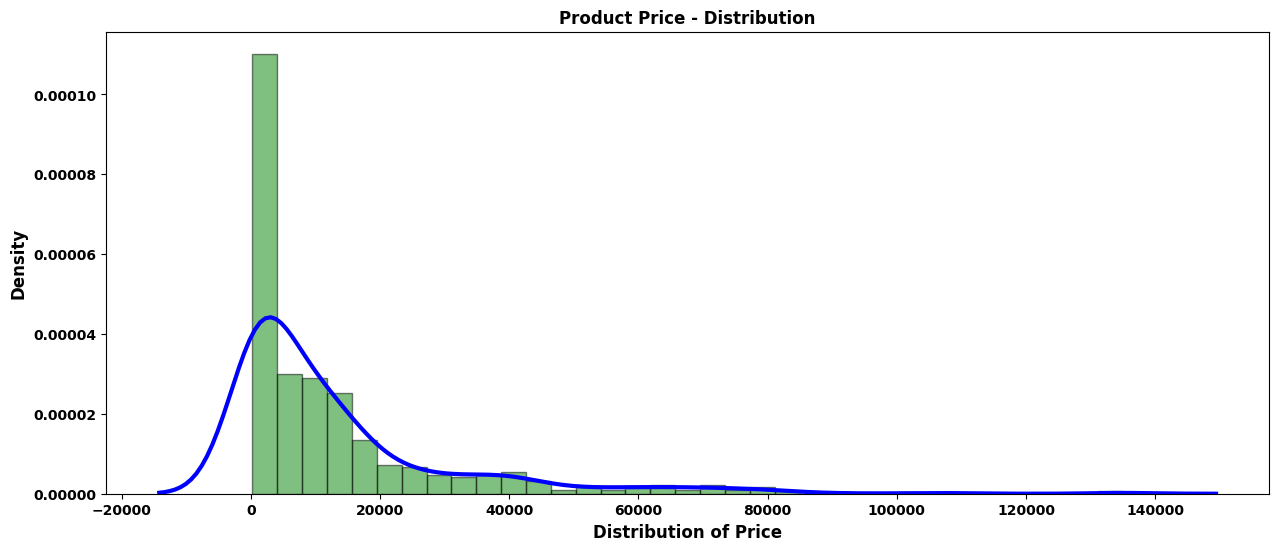

In [28]:
plt.figure(figsize=(15, 6))
plt.hist(df['Price'], density=True, bins=35, alpha=0.5, color='green', edgecolor='black')

sns.kdeplot(df['Price'], color='blue', lw=3)  

plt.xlabel('Distribution of Price', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Product Price - Distribution', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold', color='black')
plt.yticks(fontweight='bold', color='black')

plt.show()

### Insights:
Right-skewed distribution: Most products are priced at the lower end, with a long tail caused by a few high-priced items.

High concentration of affordable products: The majority of products fall in the lower price range.

Presence of extreme outliers: A small number of very expensive products stretch the distribution.

## Price Outliers Analysis (Box Plot)

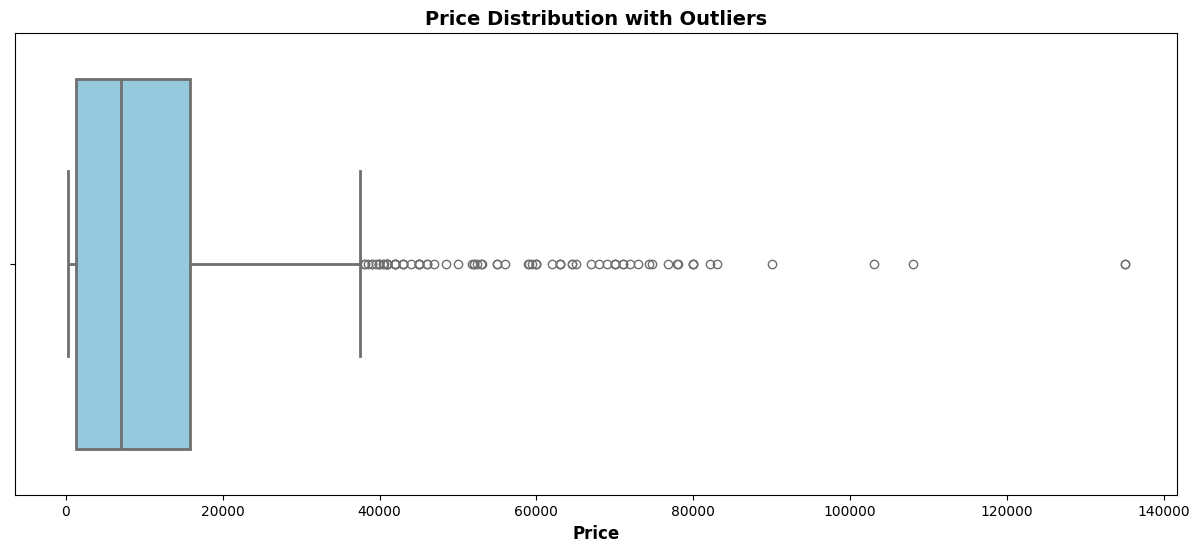

In [29]:
plt.figure(figsize=(15, 6))

sns.boxplot(
    x=df['Price'],
    color='skyblue',
    linewidth=2,
    fliersize=6
)

plt.title('Price Distribution with Outliers', fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12, fontweight='bold')

plt.show()

## Insights:
Strong presence of high-price outliers: The boxplot shows many points far beyond the upper whisker.

Most prices are tightly clustered at the lower end: The box (IQR) is compressed near the lower price range.

Extreme values significantly skew the distribution: Making median a more reliable measure than mean.

## Average Price by Category

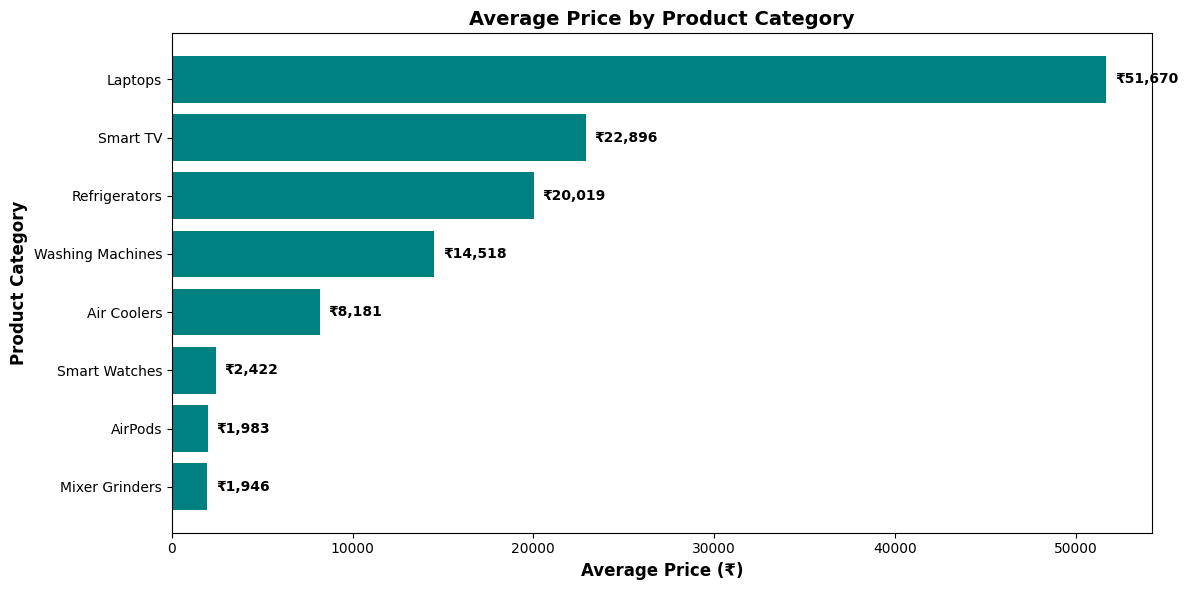

In [30]:
avg_price_by_category = df.groupby('Product Category')['Price'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
bars = plt.barh(avg_price_by_category.index, avg_price_by_category.values, color='teal')

for bar, value in zip(bars, avg_price_by_category.values):
    plt.text(value + 500, bar.get_y() + bar.get_height()/2, f'₹{value:,.0f}', 
             va='center', fontweight='bold')

plt.xlabel('Average Price (₹)', fontsize=12, fontweight='bold')
plt.ylabel('Product Category', fontsize=12, fontweight='bold')
plt.title('Average Price by Product Category', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Product Count by Category

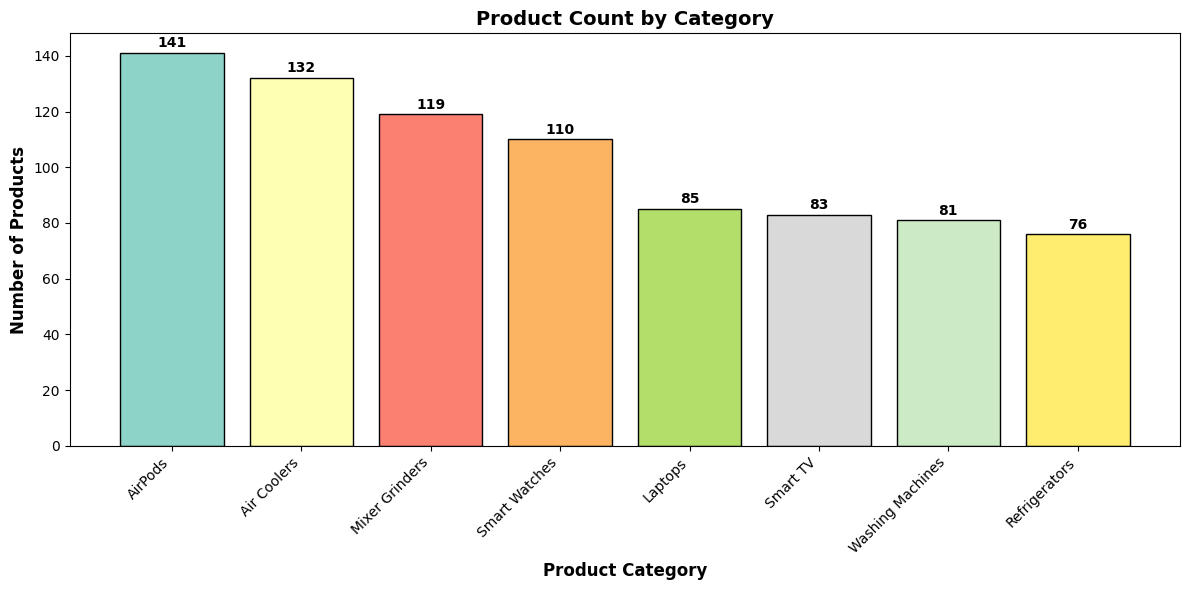

In [31]:
category_counts = df['Product Category'].value_counts()

plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(category_counts)))
bars = plt.bar(category_counts.index, category_counts.values, color=colors, edgecolor='black')

for bar, value in zip(bars, category_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(value), 
             ha='center', fontweight='bold')

plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Products', fontsize=12, fontweight='bold')
plt.title('Product Count by Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Rating Distribution

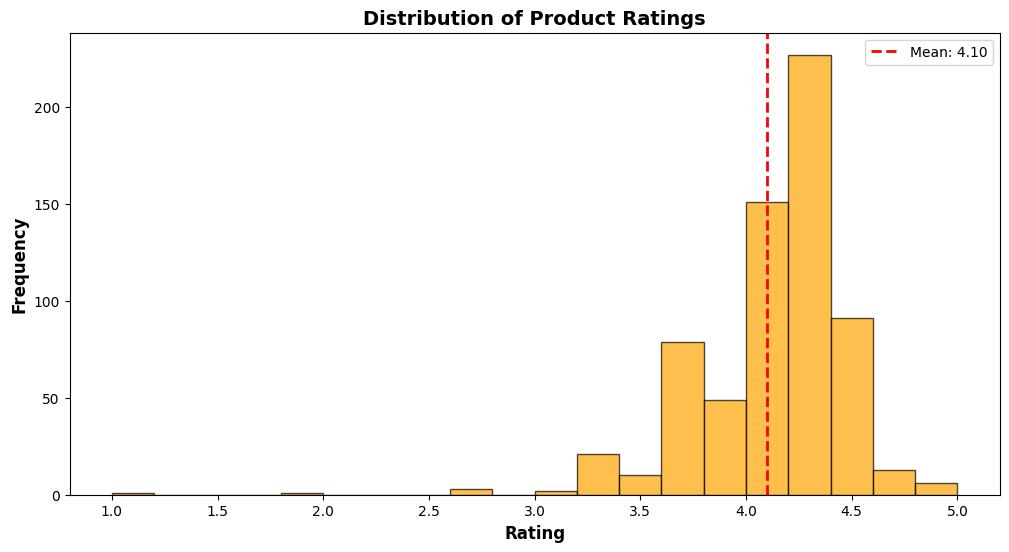

In [32]:
ratings_non_zero = df[df['Rating'] > 0]['Rating']

plt.figure(figsize=(12, 6))
plt.hist(ratings_non_zero, bins=20, color='orange', edgecolor='black', alpha=0.7)

plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Product Ratings', fontsize=14, fontweight='bold')
plt.axvline(ratings_non_zero.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {ratings_non_zero.mean():.2f}')
plt.legend()
plt.show()

## Average Rating by Category

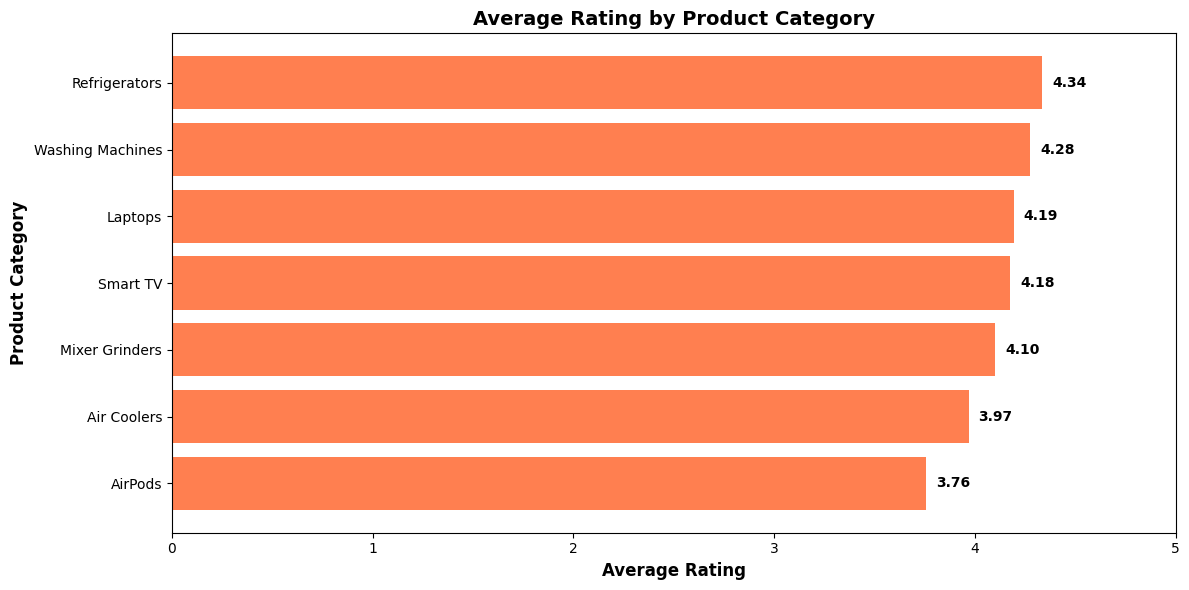

In [33]:
df_with_ratings = df[df['Rating'] > 0]
avg_rating_by_category = df_with_ratings.groupby('Product Category')['Rating'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
bars = plt.barh(avg_rating_by_category.index, avg_rating_by_category.values, color='coral')

for bar, value in zip(bars, avg_rating_by_category.values):
    plt.text(value + 0.05, bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
             va='center', fontweight='bold')

plt.xlabel('Average Rating', fontsize=12, fontweight='bold')
plt.ylabel('Product Category', fontsize=12, fontweight='bold')
plt.title('Average Rating by Product Category', fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

 ## Summary Statistics

In [34]:
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
df[['Price', 'Rating', 'Review']].describe()

SUMMARY STATISTICS


,Price,Rating,Review
count,825.000000,827.000000,827.000000
mean,13135.675152,3.241838,14397.545345
std,18426.977022,1.696932,36791.688126
min,239.000000,0.000000,0.000000
25%,1299.000000,3.500000,8.000000
50%,6994.000000,4.100000,1000.000000
75%,15790.000000,4.300000,10299.000000
max,134990.000000,5.000000,344177.000000


## Save Cleaned Data

In [35]:
df.to_csv('flipkart_cleaned_products.csv', index=False)
print(f"\nCleaned data saved to: flipkart_cleaned_products.csv")
print(f"Total rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

print("\n" + "=" * 60)
print("DATA CLEANING AND EDA COMPLETED SUCCESSFULLY!")
print("=" * 60)


Cleaned data saved to: flipkart_cleaned_products.csv
Total rows: 827
Columns: ['Product Name', 'Product Category', 'Price', 'Rating', 'Review']

DATA CLEANING AND EDA COMPLETED SUCCESSFULLY!
